In [ ]:
import warnings
warnings.simplefilter('ignore')

import os
import glob
from pathlib import Path
from dateutil.parser import parse

import numpy as np
from sunpy.map import Map
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, AsinhStretch
from aiapy.calibrate import correct_degradation
from aiapy.calibrate.util import get_correction_table

In [ ]:
def get_intersecting_files(
    path, 
    dirs, 
    months=None, 
    years=None, 
    n_samples=None, 
    ext=None, 
    basenames=None, 
    **kwargs
):
    """
    Get intersecting files from multiple directories

    Args:
        path (str): Path to directories
        dirs (list): List of directories
        months (list): List of months
        years (list): List of years
        n_samples (int): Number of samples
        ext (str): File extension
        basenames (list): List of basenames
        **kwargs: Additional arguments

    Returns:
        list: List of intersecting files
    """
    pattern = '*' if ext is None else '*' + ext
    if basenames is None:
        basenames = [
            [os.path.basename(path) for path in glob.glob(os.path.join(path, str(d), '**', pattern), recursive=True)]
            for d in dirs]
        basenames = list(set(basenames[0]).intersection(*basenames))
    if months:  # assuming filename is parsable datetime
        basenames = [bn for bn in basenames if parse(bn.split('.')[0]).month in months]
    if years:  # assuming filename is parsable datetime
        basenames = [bn for bn in basenames if parse(bn.split('.')[0]).year in years]
    basenames = sorted(list(basenames))
    if n_samples:
        basenames = basenames[::len(basenames) // n_samples]
    return [[os.path.join(path, str(dir), b) for b in basenames] for dir in dirs]


def get_local_correction_table(overwrite=False):
    """
    Get local correction table for AIA data

    Args:
        overwrite (bool): overwrite the existing correction

    Returns:
        correction_table (pd.DataFrame): correction table
    """
    path = os.path.join(Path.home(), 'aiapy', 'correction_table.dat')
    if os.path.exists(path) and not overwrite:
        return get_correction_table(correction_table=path)
    os.makedirs(os.path.join(Path.home(), 'aiapy'), exist_ok=True)
    correction_table = get_correction_table()
    ascii.write(correction_table, path)
    return correction_table


sdo_norms = {
    171: ImageNormalize(vmin=0, vmax=8600, 
                        stretch=AsinhStretch(0.005), 
                        clip=True),
    193: ImageNormalize(vmin=0, vmax=9800, 
                        stretch=AsinhStretch(0.005),
                        clip=True),
    304: ImageNormalize(vmin=0, vmax=8800, 
                        stretch=AsinhStretch(0.001), 
                        clip=True),
}


correction_table = get_local_correction_table()

In [ ]:
aia_files = get_intersecting_files('../sdo_raw', dirs=[171, 193, 304],
                                   months=[7],
                                   years=[2020])
len(aia_files), aia_files[0]

(3,
 ['../sdo_raw/171/2020-07-01T00-00-00.fits',
  '../sdo_raw/171/2020-07-02T00-00-00.fits',
  '../sdo_raw/171/2020-07-03T00-00-00.fits',
  '../sdo_raw/171/2020-07-04T00-00-00.fits',
  '../sdo_raw/171/2020-07-05T00-00-00.fits',
  '../sdo_raw/171/2020-07-06T00-00-00.fits',
  '../sdo_raw/171/2020-07-07T00-00-00.fits',
  '../sdo_raw/171/2020-07-08T00-00-00.fits',
  '../sdo_raw/171/2020-07-09T00-00-00.fits',
  '../sdo_raw/171/2020-07-10T00-00-00.fits',
  '../sdo_raw/171/2020-07-11T00-00-00.fits',
  '../sdo_raw/171/2020-07-12T00-00-00.fits',
  '../sdo_raw/171/2020-07-13T00-00-00.fits',
  '../sdo_raw/171/2020-07-14T00-00-00.fits',
  '../sdo_raw/171/2020-07-15T00-00-00.fits',
  '../sdo_raw/171/2020-07-16T00-00-00.fits',
  '../sdo_raw/171/2020-07-17T00-00-00.fits',
  '../sdo_raw/171/2020-07-18T00-00-00.fits',
  '../sdo_raw/171/2020-07-19T00-00-00.fits',
  '../sdo_raw/171/2020-07-21T00-00-00.fits',
  '../sdo_raw/171/2020-07-22T00-00-00.fits',
  '../sdo_raw/171/2020-07-23T00-00-00.fits',
  '../

In [ ]:
Path(aia_files[0][0]).parent.name

'171'

In [ ]:
aia_files[0][0]

'aia/171/2020-07-01T00:00:00.fits'

Solar radius : 1574.70 pix => 400.00 pix = 1 solar radii
Resolution/2 : 2048.00 pix => 512.00 pix = 1.28 solar radii


Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2020-07-01 00:00:09
Exposure Time,2.000184 s
Dimension,[1042. 1042.] pix
Coordinate System,helioprojective
Scale,[2.36003091 2.36003091] arcsec / pix
Reference Pixel,[520.5 520.5] pix

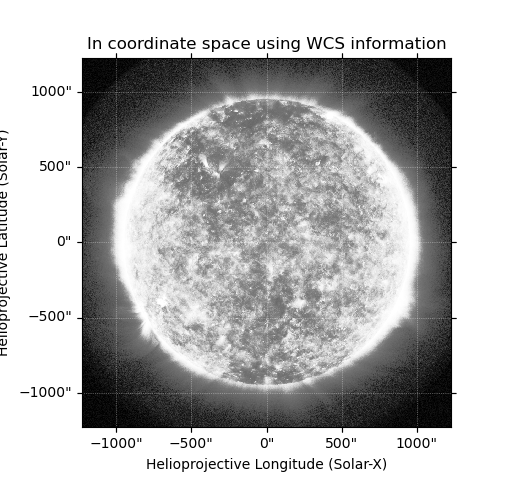
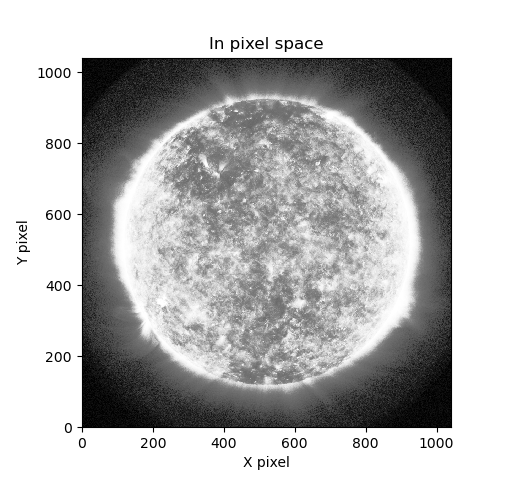
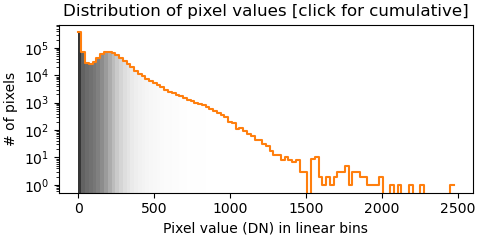
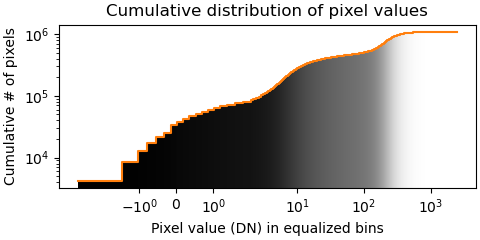

In [ ]:
resolution = 1024      # 1024 x 1024
padding_factor = 0.28  # 1.28 solar radii
wavelength = 171

# Select the first file
file = aia_files[0][0]

# Load the map
s_map = Map(file)
s_map.meta['timesys'] = 'tai'  # fix leap seconds

original_map = s_map

# Rotate & Scale
r_obs_pix = s_map.rsun_obs / s_map.scale[0]  
print(f"Solar radius : {r_obs_pix.value:.2f} pix => {(resolution / 2) / (1 + padding_factor):.2f} pix = 1 solar radii")
print(f"Resolution/2 : {s_map.data.shape[0]/2:.2f} pix => {resolution/2:.2f} pix = {1+padding_factor:.2f} solar radii")
r_obs_pix = (1 + padding_factor) * r_obs_pix
scale_factor = resolution / (2 * r_obs_pix.value)
s_map = Map(np.nan_to_num(s_map.data).astype(np.float32), s_map.meta)
s_map = s_map.rotate(recenter=True, scale=scale_factor, missing=0, order=4)
s_map

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2020-07-01 00:00:09
Exposure Time,2.000184 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.36003091 2.36003091] arcsec / pix
Reference Pixel,[511.5 511.5] pix

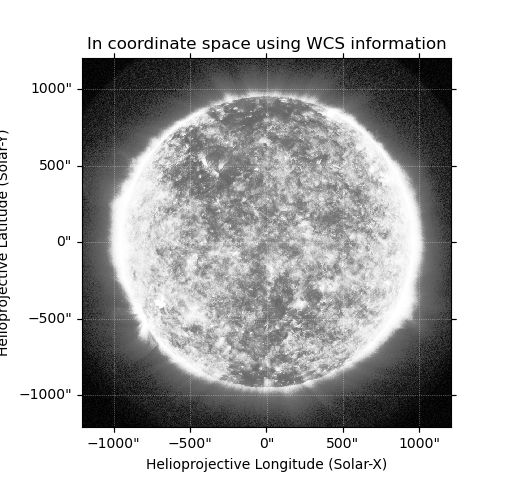
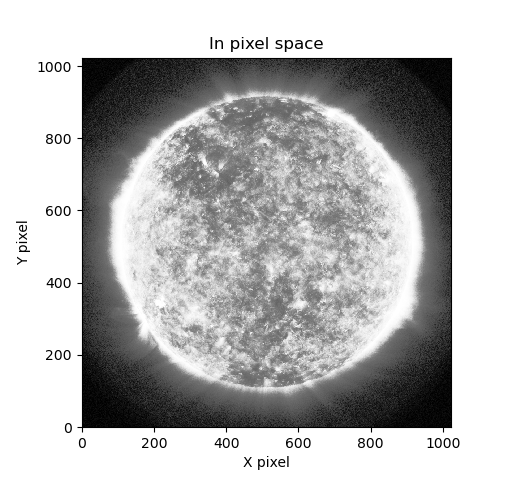
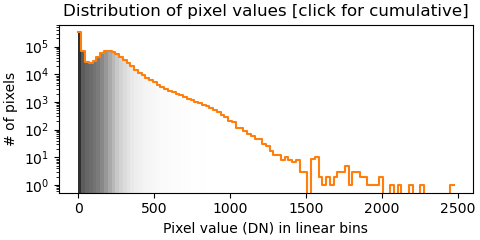
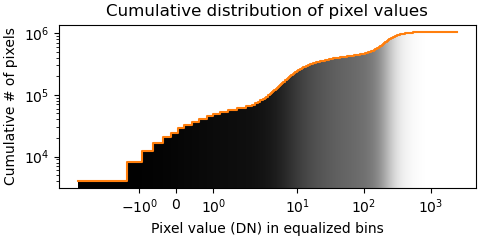

In [ ]:
# Crop & Padding
arcs_frame = (resolution / 2) * s_map.scale[0].value  # half width in arcseconds
# print(f"Resolution/2 : {arcs_frame:.2f} arcsec")
s_map = s_map.submap(
    bottom_left=SkyCoord(-arcs_frame*u.arcsec, -arcs_frame*u.arcsec, frame=s_map.coordinate_frame),
    top_right=SkyCoord(arcs_frame*u.arcsec, arcs_frame*u.arcsec, frame=s_map.coordinate_frame)
)
pad_x = s_map.data.shape[0] - resolution
pad_y = s_map.data.shape[1] - resolution
s_map = s_map.submap(
    bottom_left=[pad_x // 2, pad_y // 2] * u.pix,
    top_right=[pad_x // 2 + resolution - 1, pad_y // 2 + resolution - 1] * u.pix
)
if s_map.data.shape[0] < resolution or s_map.data.shape[1] < resolution:
    data = s_map.data
    new_data = np.zeros((resolution, resolution))
    padding_x = (resolution - data.shape[0]) // 2
    padding_y = (resolution - data.shape[1]) // 2
    new_data[padding_x:padding_x + data.shape[0], padding_y:padding_y + data.shape[1]] = data
    s_map = Map(new_data, s_map.meta)
s_map

In [ ]:
print(s_map.meta['r_sun'])
s_map.meta['r_sun'] = s_map.rsun_obs.value / s_map.meta['cdelt1']
print(s_map.meta['r_sun'])

1574.69519
400.00000000000006


In [ ]:
(original_map.data.sum() / s_map.data.sum())*(original_map.dsun.to_value(u.AU) / 1)**2

16.028882297554823

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2020-07-01 00:00:09
Exposure Time,2.000184 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.36003091 2.36003091] arcsec / pix
Reference Pixel,[511.5 511.5] pix

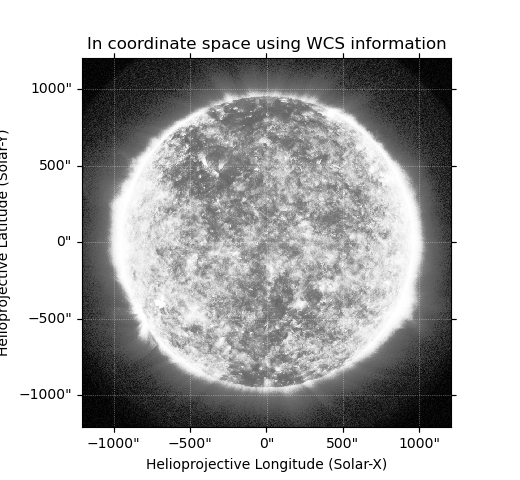
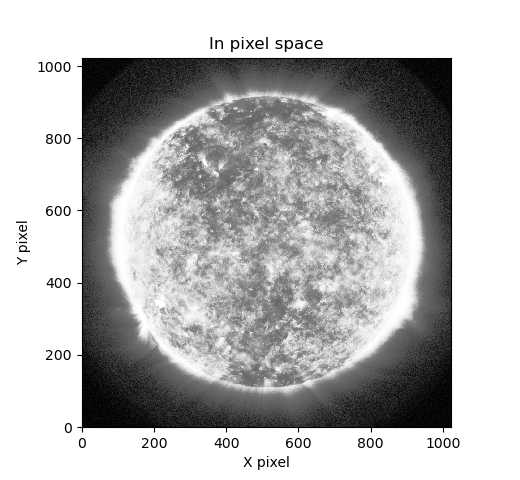
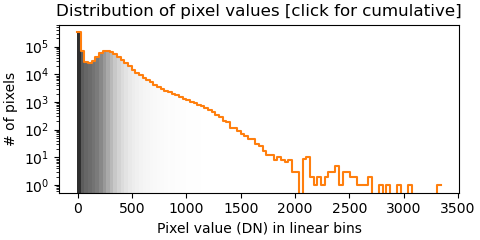
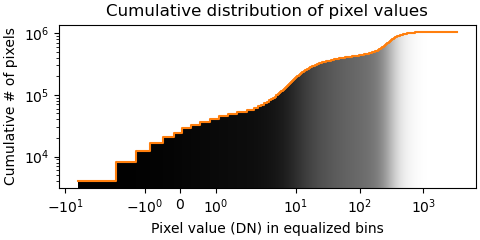

In [ ]:
# Correct Degradation
s_map = correct_degradation(s_map, correction_table=correction_table)
s_map

1671.47955289491 -3.1408597551767508


Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2020-07-01 00:00:09
Exposure Time,2.000184 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.36003091 2.36003091] arcsec / pix
Reference Pixel,[511.5 511.5] pix

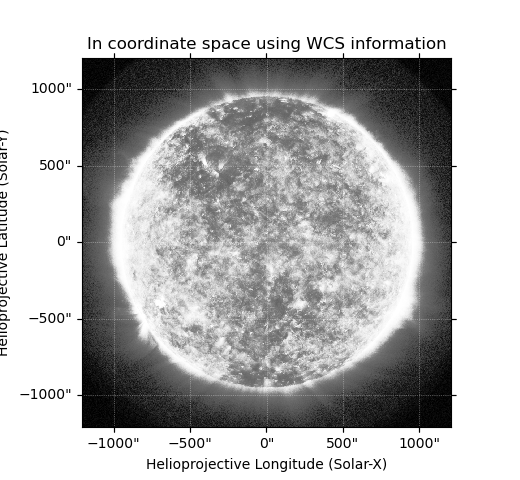
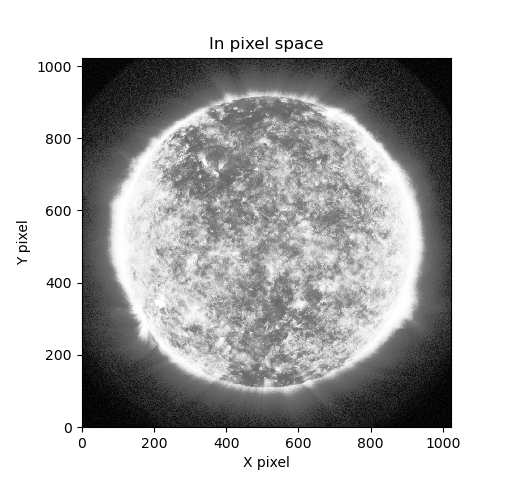
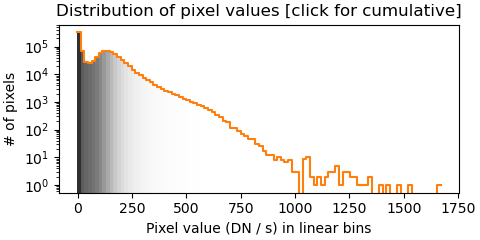
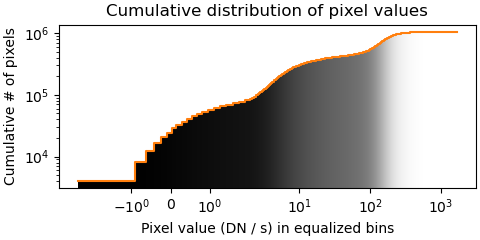

In [ ]:
data = np.nan_to_num(s_map.data)
data = data / s_map.meta["exptime"]
print(np.max(data), np.min(data))
s_map.meta['bunit'] = 'DN/s'
s_map = Map(data.astype(np.float32), s_map.meta)
s_map

$$0 \le d \le 2^{14} - 1$$

$$1 \le d + 1 \le 2^{14}$$

$$0 \le \log_2(d + 1) \le 14$$

$$c = \log_2(d+1)$$

$$0 - ((14 + 0)/2) \le c - ((14 + 0)/2) \le 14 - ((14 + 0)/2)$$

$$-7 \le c - 7 \le 7$$

$$-7/((14-0)/2) \le (c - 7) /((14-0)/2) \le 7 /((14-0)/2)$$

$$-1 \le \text{data} \le 1$$

In [ ]:
class Normalizer:
    
    def __init__(self, LoLim, UpLim):
        if LoLim == 0:
            l_lim = 0
        else:
            l_lim = 2**LoLim-1
        u_lim = 2**UpLim-1

        self.l_lim = l_lim
        self.u_lim = u_lim
        self.LoLim = LoLim
        self.UpLim = UpLim
    
    def normalize(self, data):
        l_lim = self.l_lim
        u_lim = self.u_lim
        LoLim = self.LoLim
        UpLim = self.UpLim
        data = np.clip(data, l_lim, u_lim)                       # data     -> [2**LoLim-1, 2**UpLim-1]
        data = np.log2(data + 1)                                 # data + 1 -> [LoLim, UpLim]
        data = (data -((UpLim + LoLim)/2))/((UpLim - LoLim)/2)   # data + 1 -> [-1, 1]
        return data
    
    def inverse(self, data):
        l_lim = self.l_lim
        u_lim = self.u_lim
        LoLim = self.LoLim
        UpLim = self.UpLim
        data = data * ((UpLim - LoLim)/2) + ((UpLim + LoLim)/2)  # data -> [LoLim, UpLim]
        data = 2**data - 1                                       # data -> [2**LoLim-1, 2**UpLim-1]
        return data

In [ ]:
# Normalize
UpLim = 14
LoLim = 0
norm = Normalizer(LoLim, UpLim)

In [ ]:
data_ori = s_map.data

data_norm = norm.normalize(s_map.data)
print(np.max(data_norm), np.min(data_norm))

data_denorm = norm.inverse(data_norm)
print(np.max(data_denorm), np.min(data_denorm))

data_clip = np.clip(data_ori, norm.l_lim, norm.u_lim)
print(np.max(data_clip), np.min(data_clip))

print(np.allclose(data_clip, data_denorm, atol=1e-3))

0.52968186 -1.0
1671.48 0.0
1671.4795 0.0
True


In [ ]:
# Normalize
norm = sdo_norms[wavelength]      # data   -> [0, 1]
data = norm(s_map.data) * 2 - 1   # [0, 1] -> [-1, 1]

#Save
save_dir = Path('aia_prep')
save_path = save_dir / str(wavelength) / Path(file).name
save_path.parent.mkdir(exist_ok=True, parents=True)
Map(data, s_map.meta).save(save_path, filetype='fits', overwrite=True)
print(f"Saved : {save_path}")

Saved : aia_prep/171/2020-07-01T00:00:00.fits


Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2020-07-01 00:00:09
Exposure Time,2.000184 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.599489 0.599489] arcsec / pix
Reference Pixel,[2050.538818 2050.033203] pix

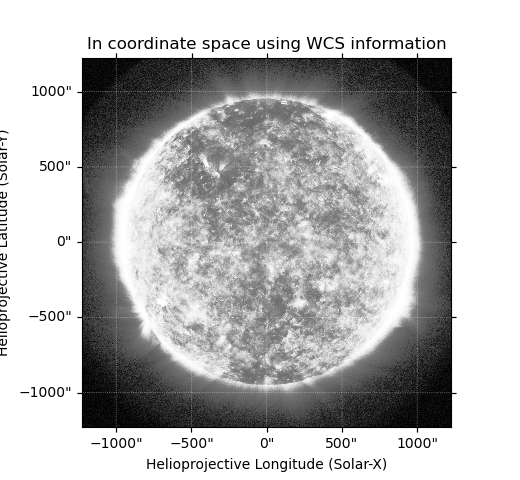
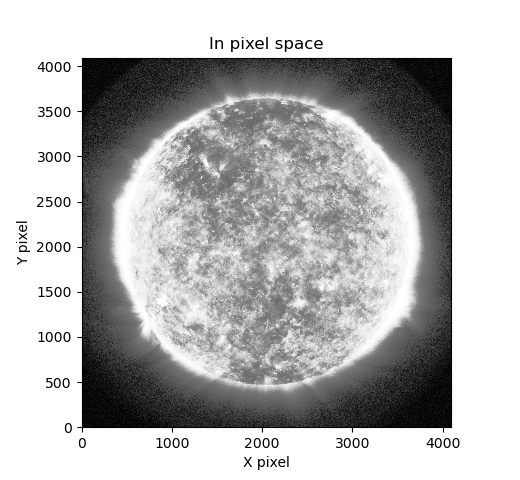
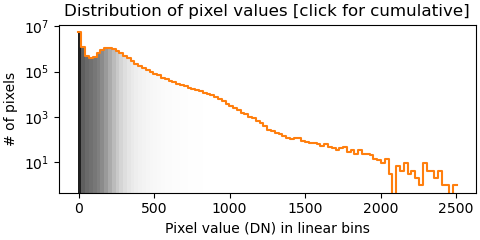
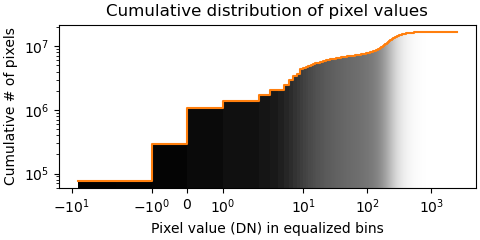

In [ ]:
Map(file)

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2020-07-01 00:00:09
Exposure Time,2.000184 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.36003091 2.36003091] arcsec / pix
Reference Pixel,[511.5 511.5] pix

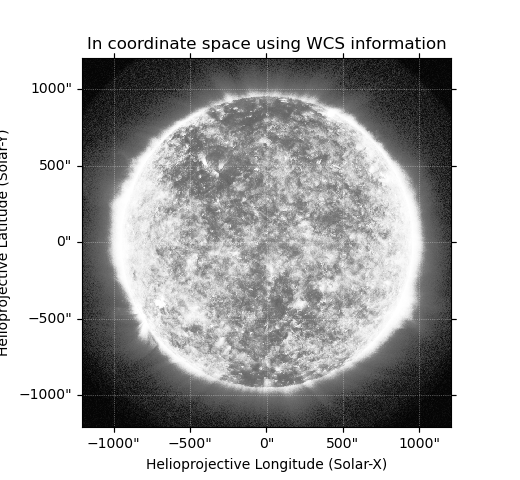
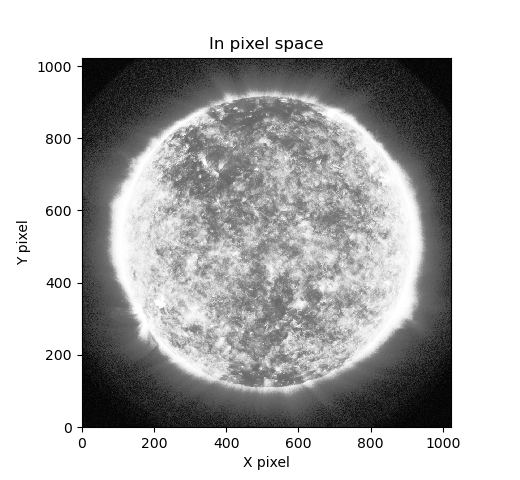
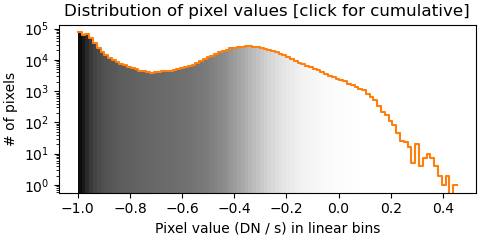
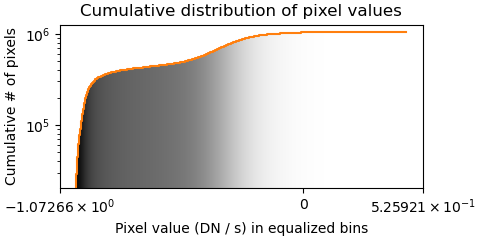

In [ ]:
Map(save_path)